# Assignment 3 
u6664231

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Question 1  Git in practice 

See commit history on public repo: https://github.com/gkb21/ASTR4004_assignment3

Also note for the first dozen or so commits I was playing around with how branching and merging worked and what I could and couldn't do so sorry for the chaos  

## Question 2 Using ADQL to Search for Bright Stars Around the Open Cluster M67

A colleague is interested in the open cluster Messier 67 (RA = 132.825 deg, Dec = 11.8 deg)
and is considering an observation proposal using the 2dF fibre positioner and HERMES
spectrograph (effective for Gaia G band magnitudes < 14). They need to know if there
are enough bright stars in this region for observation. Your task is to assist by querying
data from Gaia DR3 and performing some basic analysis.

- #### Download all stars within 1 degree of the center of Messier 67 that are brighter than G = 14 in Gaia DR3 (the table is called gaiadr gaia source) and include a crossmatch these stars with the 2MASS catalog and report your ADQL query text (use the """query""" notation)

In [2]:
from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table

# Define the center of Messier 67
ra_m67 = 132.825   # Right Ascension in degrees
dec_m67 = 11.8 # Declination in degrees
radius = 1.0  # Search radius in degrees
mag_limit = 14  # Magnitude limit

'''
This is a query for stars that are 1 degree of the center of Messier 67 that are brighterthan G = 14
from Gaia DR3 with a 2mass crossmatch
'''
gaia_2mass_crossmatch_query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id)
JOIN gaiaedr3.tmass_psc_xsc_join AS xjoin USING (clean_tmass_psc_xsc_oid)
JOIN gaiadr1.tmass_original_valid AS tmass
    ON xjoin.original_psc_source_id = tmass.designation

WHERE CONTAINS(
        POINT(gaia.ra, gaia.dec), 
        CIRCLE({ra_m67}, {dec_m67}, {radius})
    ) = 1
    AND gaia.phot_g_mean_mag < {mag_limit}
ORDER BY gaia.phot_g_mean_mag

"""

# Runs the ADQL query for 'gaia_2mass_crossmatch_query'
job = Gaia.launch_job(gaia_2mass_crossmatch_query ) 
results = job.get_results()
# Convert to pandas data frame   
gaia_2mass_crossmatch_query_data_table = results.to_pandas()
print(gaia_2mass_crossmatch_query_data_table)


Important:  Gaia archive will be intermittently unavailable due to scheduled maintenance on 14-10-2024 from 10:30 to 12:30 (CEST)
3992895126.py:               solution_id                  DESIGNATION  random_index  \
0     1636148068921376768  Gaia DR3 608020176290124544     365257723   
1     1636148068921376768  Gaia DR3 598677041873269888     347884130   
2     1636148068921376768  Gaia DR3 604920240695111424     441504422   
3     1636148068921376768  Gaia DR3 604992258706635520     554171204   
4     1636148068921376768  Gaia DR3 604684326730942592     803047084   
...                   ...                          ...           ...   
1013  1636148068921376768  Gaia DR3 608127481752974720     135826423   
1014  1636148068921376768  Gaia DR3 604901652076632960    1318611312   
1015  1636148068921376768  Gaia DR3 604972226979105664     837264516   
1016  1636148068921376768  Gaia DR3 607987736401416576     711162152   
1017  1636148068921376768  Gaia DR3 598890381488889088     5033

- #### Determine how many stars are returned from the initial query.a

In [3]:
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
num_stars = len(gaia_2mass_crossmatch_query_data_table)
print(f"Number of stars brighter than G={mag_limit} within 1 degree of M67: {num_stars}") # prints number of stars 

1049463862.py: Number of stars brighter than G=14 within 1 degree of M67: 1018


- #### Identify any stars with bad 2MASS photometry, where ph qual is not ’AAA’.

In [4]:
'''
Filter the stars where ph_qual is NOT 'AAA' leaving behind 
only the bad 2MASS photometry stars using pandas query
'''
bad_photometry_stars = gaia_2mass_crossmatch_query_data_table.query("ph_qual != 'AAA'")
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
num_bad_photometry_stars = len(bad_photometry_stars)
print(num_bad_photometry_stars) # prints the number of bad 2MASS photometry stars
print(bad_photometry_stars) # prints a table of bad 2MASS photometry stars 


2318596945.py: 21
2318596945.py:              solution_id                  DESIGNATION  random_index  \
0    1636148068921376768  Gaia DR3 608020176290124544     365257723   
1    1636148068921376768  Gaia DR3 598677041873269888     347884130   
4    1636148068921376768  Gaia DR3 604684326730942592     803047084   
22   1636148068921376768  Gaia DR3 605101037342309376    1275034334   
24   1636148068921376768  Gaia DR3 598689102141448320     446746802   
25   1636148068921376768  Gaia DR3 598955115237068032     594867401   
69   1636148068921376768  Gaia DR3 604950271106216064     156518440   
97   1636148068921376768  Gaia DR3 604911268507711232    1004522431   
173  1636148068921376768  Gaia DR3 604917835513458688     941052385   
314  1636148068921376768  Gaia DR3 604713459494948352     532598536   
403  1636148068921376768  Gaia DR3 598689102142789760    1573797226   
435  1636148068921376768  Gaia DR3 604636321880758144     383307719   
464  1636148068921376768  Gaia DR3 598921030

In [5]:
# All the stars with bad 2MASS photometry
print(bad_photometry_stars['DESIGNATION'])

1949986983.py: 0      Gaia DR3 608020176290124544
1      Gaia DR3 598677041873269888
4      Gaia DR3 604684326730942592
22     Gaia DR3 605101037342309376
24     Gaia DR3 598689102141448320
25     Gaia DR3 598955115237068032
69     Gaia DR3 604950271106216064
97     Gaia DR3 604911268507711232
173    Gaia DR3 604917835513458688
314    Gaia DR3 604713459494948352
403    Gaia DR3 598689102142789760
435    Gaia DR3 604636321880758144
464    Gaia DR3 598921030375475200
558    Gaia DR3 604917831219174528
569    Gaia DR3 604921202767811712
592    Gaia DR3 598925943818062208
641    Gaia DR3 604904847532342528
660    Gaia DR3 598896841119762816
803    Gaia DR3 604904847532342272
900    Gaia DR3 598921030375475072
928    Gaia DR3 608019317296666624
Name: DESIGNATION, dtype: object


- #### Identify any stars with negative (or non-positive) parallaxes in the Gaia data.

In [6]:
# Filter to leave only negative parallaxes and null parallaxes in our data set using pandas query 
negative_parallax_stars = gaia_2mass_crossmatch_query_data_table.query('parallax.isnull() or parallax <= 0')
# Determines how many stars are in the filtered data set via checking the len of the amount of entries 
num_bad_photometry_stars = len(negative_parallax_stars)
print(num_bad_photometry_stars) #prints the num of stars with egative parallaxes and null parallaxes
print(negative_parallax_stars) # prints pandas table of stars 

1152096193.py: 9
1152096193.py:              solution_id                  DESIGNATION  random_index  \
86   1636148068921376768  Gaia DR3 604917663716360576     324647624   
155  1636148068921376768  Gaia DR3 604921546365012480     131241535   
179  1636148068921376768  Gaia DR3 604921542069455104     544905365   
243  1636148068921376768  Gaia DR3 598886739356653696    1501496757   
295  1636148068921376768  Gaia DR3 598873953238690816      49906729   
534  1636148068921376768  Gaia DR3 604918282190043648    1391376225   
754  1636148068921376768  Gaia DR3 598847569256078464     314066461   
832  1636148068921376768  Gaia DR3 598892580511613312     683012459   
945  1636148068921376768  Gaia DR3 598892580512198144    1004824233   

     ref_epoch          ra   ra_error        dec  dec_error  parallax  \
86      2016.0  132.861743   7.256874  11.811254   3.914955       NaN   
155     2016.0  132.836633   5.527748  11.890591   3.062133       NaN   
179     2016.0  132.836514   0.798105 

- #### Apply these two quality cuts (removing stars with bad 2MASS photometry and non-positive parallaxes). After applying the cuts, determine how many stars remain.

In [7]:
'''
Filter out both negative parallaxes and null parallaxes using pandas query as well
as making sure that stars don't have bad 2MASS photometry using pandas query 
'''
filtered_gaia_2mass_crossmatch_query_data= gaia_2mass_crossmatch_query_data_table.query("ph_qual == 'AAA' and parallax.notnull() and parallax > 0")
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
filtered_num_stars = len(filtered_gaia_2mass_crossmatch_query_data)
# prints the amount of filtered stars 
print(f"Number of stars brighter than G={mag_limit} within 1 degree of M67 that are ph_qual AAA quality and parallax is not <0 or nan: {filtered_num_stars}")


3150013278.py: Number of stars brighter than G=14 within 1 degree of M67 that are ph_qual AAA quality and parallax is not <0 or nan: 988


- #### Using the remaining stars, generate a figure with two panels (1 point per panel):


(a) A color-magnitude diagram (CMD) of Gaia BP-RP vs. absolute G magnitude.


(b) A 2MASS J-Ks vs. apparent K magnitude diagram.

- #### Save the figure as figures/cmds M67.png with a resolution of 200 dots per inch

- #### Give your colleague a recommendation for the potential proposal when only judging the fibre usage.

## Question 3 The radial metallicity relation in simulated data 

The radial metallicity relation is a function that describes the change of metallicity -
here the gas phase metallicity $A(O) = log10(NO/NH) + 12$ - along the galactocentric
radius $R_{Gal}$.. Understanding the radial metallicity gradient in galaxies provides critical
insights into their formation and evolutionary processes, such as inside-out formation,
gas accretion, outflows, and radial migration. A lot of work has been done through
observational studies (e.g. Ho et al., 2017, ApJ, 846, 39) and a few simulations (e.g.
Grand et al., 2016, MNRAS, 460, 94), but more works needs to be done to understand
the radial metallicity gradient!
Your colleague has just finished an exciting cosmological simulation that traces the
gas phase metallicity for a Milky Way analogue, that is, a spiral galaxy. They have
limited the simulation data to the positions (x, y, z) of the innermost gas particles
(RGal. < 25 kpc) and their gas phase metallicity A(O) and uploaded them as a FITS
file for you here: https://github.com/svenbuder/astr4004_2024_week7/blob/main/data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits

In [8]:
# Import modules
import pandas as pd
from astropy.table import Table # this works well for FITS data catalogues
from astropy.io import fits # this is your more agnostic way to work for FITS images
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

#### - Download the file from the link above into **data/**. Load the file with python and then perform the following tasks to create figures that are saved in **figures/**:

In [9]:
# FITS Images
fits_file = fits.open('data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits', ignore_missing_simple=True) # Open fits file
print(fits_file)

3266727671.py: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1642ae410>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16447bc90>]


In [10]:
print(fits_file.info()) #Information for this fits file

Filename: data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (678,)   uint8   
  1  /Users/buder/Simulations/preparing_NIHAO/NIHAO_prepared/NIHAO_g8.26e    1 BinTableHDU     21   511520R x 4C   [E, E, E, D]   
1045252056.py: None


In [11]:
#print the header for the Primary Extension
print(fits_file[0].header.items)

882215134.py: <bound method Header.items of SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                  678 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a per

In [12]:
# Put fits data into a table of x,y,z and A_0
data = fits_file[1].data
data_table = Table(data)
print(data_table.colnames)
print(data_table) 

2085306342.py: ['x', 'y', 'z', 'A_O']
2085306342.py:      x           y           z             A_O       
----------- ----------- ----------- -----------------
  10.020546  -15.421509   -3.241711 8.428943189382553
 -13.487837   5.6635065  -0.8023056 8.671106847524642
   6.642289 -0.13894245  -0.5859607 8.891595783233642
 0.20393881   4.1123734 -0.14762174 8.977195146083831
 -20.824045    6.971037  -1.7580608 8.326950194835662
  5.3447924   18.439764   1.9853237 8.536727162599563
  22.162682    5.025803   2.6751451 8.323067548274993
  1.6786892    24.85231  0.67804474 8.362448933124542
  19.999903   3.7504601   1.1096945 8.336060168743133
 -2.9554436   20.133005   -1.932177 8.343063088655471
        ...         ...         ...               ...
 -0.9178076   -1.833632 -0.23717117 9.094153168201446
 -0.7422366  -1.6049787 -0.14949895 9.139604213237762
 -0.7422366   -1.603936  -0.1486693 9.139604213237762
-0.74240154  -1.6039217 -0.14868727 9.139604213237762
  1.5331887  0.99755794  0.21

(a) Logarithmic density plot of RGal. vs. A(O), with a linear fit and legend.

In [13]:
# Calculate RGal from x, y, z positions
x = data_table['x']
y = data_table['y']
z = data_table['z']
A_O = data_table['A_O']
# Calculate RGal
RGal = np.sqrt(x**2 + y**2 + z**2)

In [14]:
import statsmodels.api as sm

# Linear model
x_with_intercept = sm.add_constant(RGal)  # Adds the intercept term
linear_model = sm.OLS(A_O, x_with_intercept).fit()

In [15]:
# Setting up model for plotting 
x_smooth = np.linspace(min(RGal), max(RGal), 500) # set up x coordinates 
linear_fit = linear_model.params[0] + linear_model.params[1] * x_smooth # set up y coodinates 


In [17]:
# Finds the residuals of the linear fit 
residuals = A_O - linear_model.predict(x_with_intercept)
#plt.scatter(RGal, residuals, s=2, alpha=1)
#plt.axhline(0, color='red', linestyle='--', label='Zero Residual')

In [18]:

#plt.hexbin(RGal, residuals, gridsize=100, cmap='inferno')
#plt.colorbar(label='Counts')
#plt.axhline(0, color='red', linestyle='--', label='Zero Residual')

(b) Residuals of the fit, $R_{Gal}$. vs. $\Delta A(O)$.

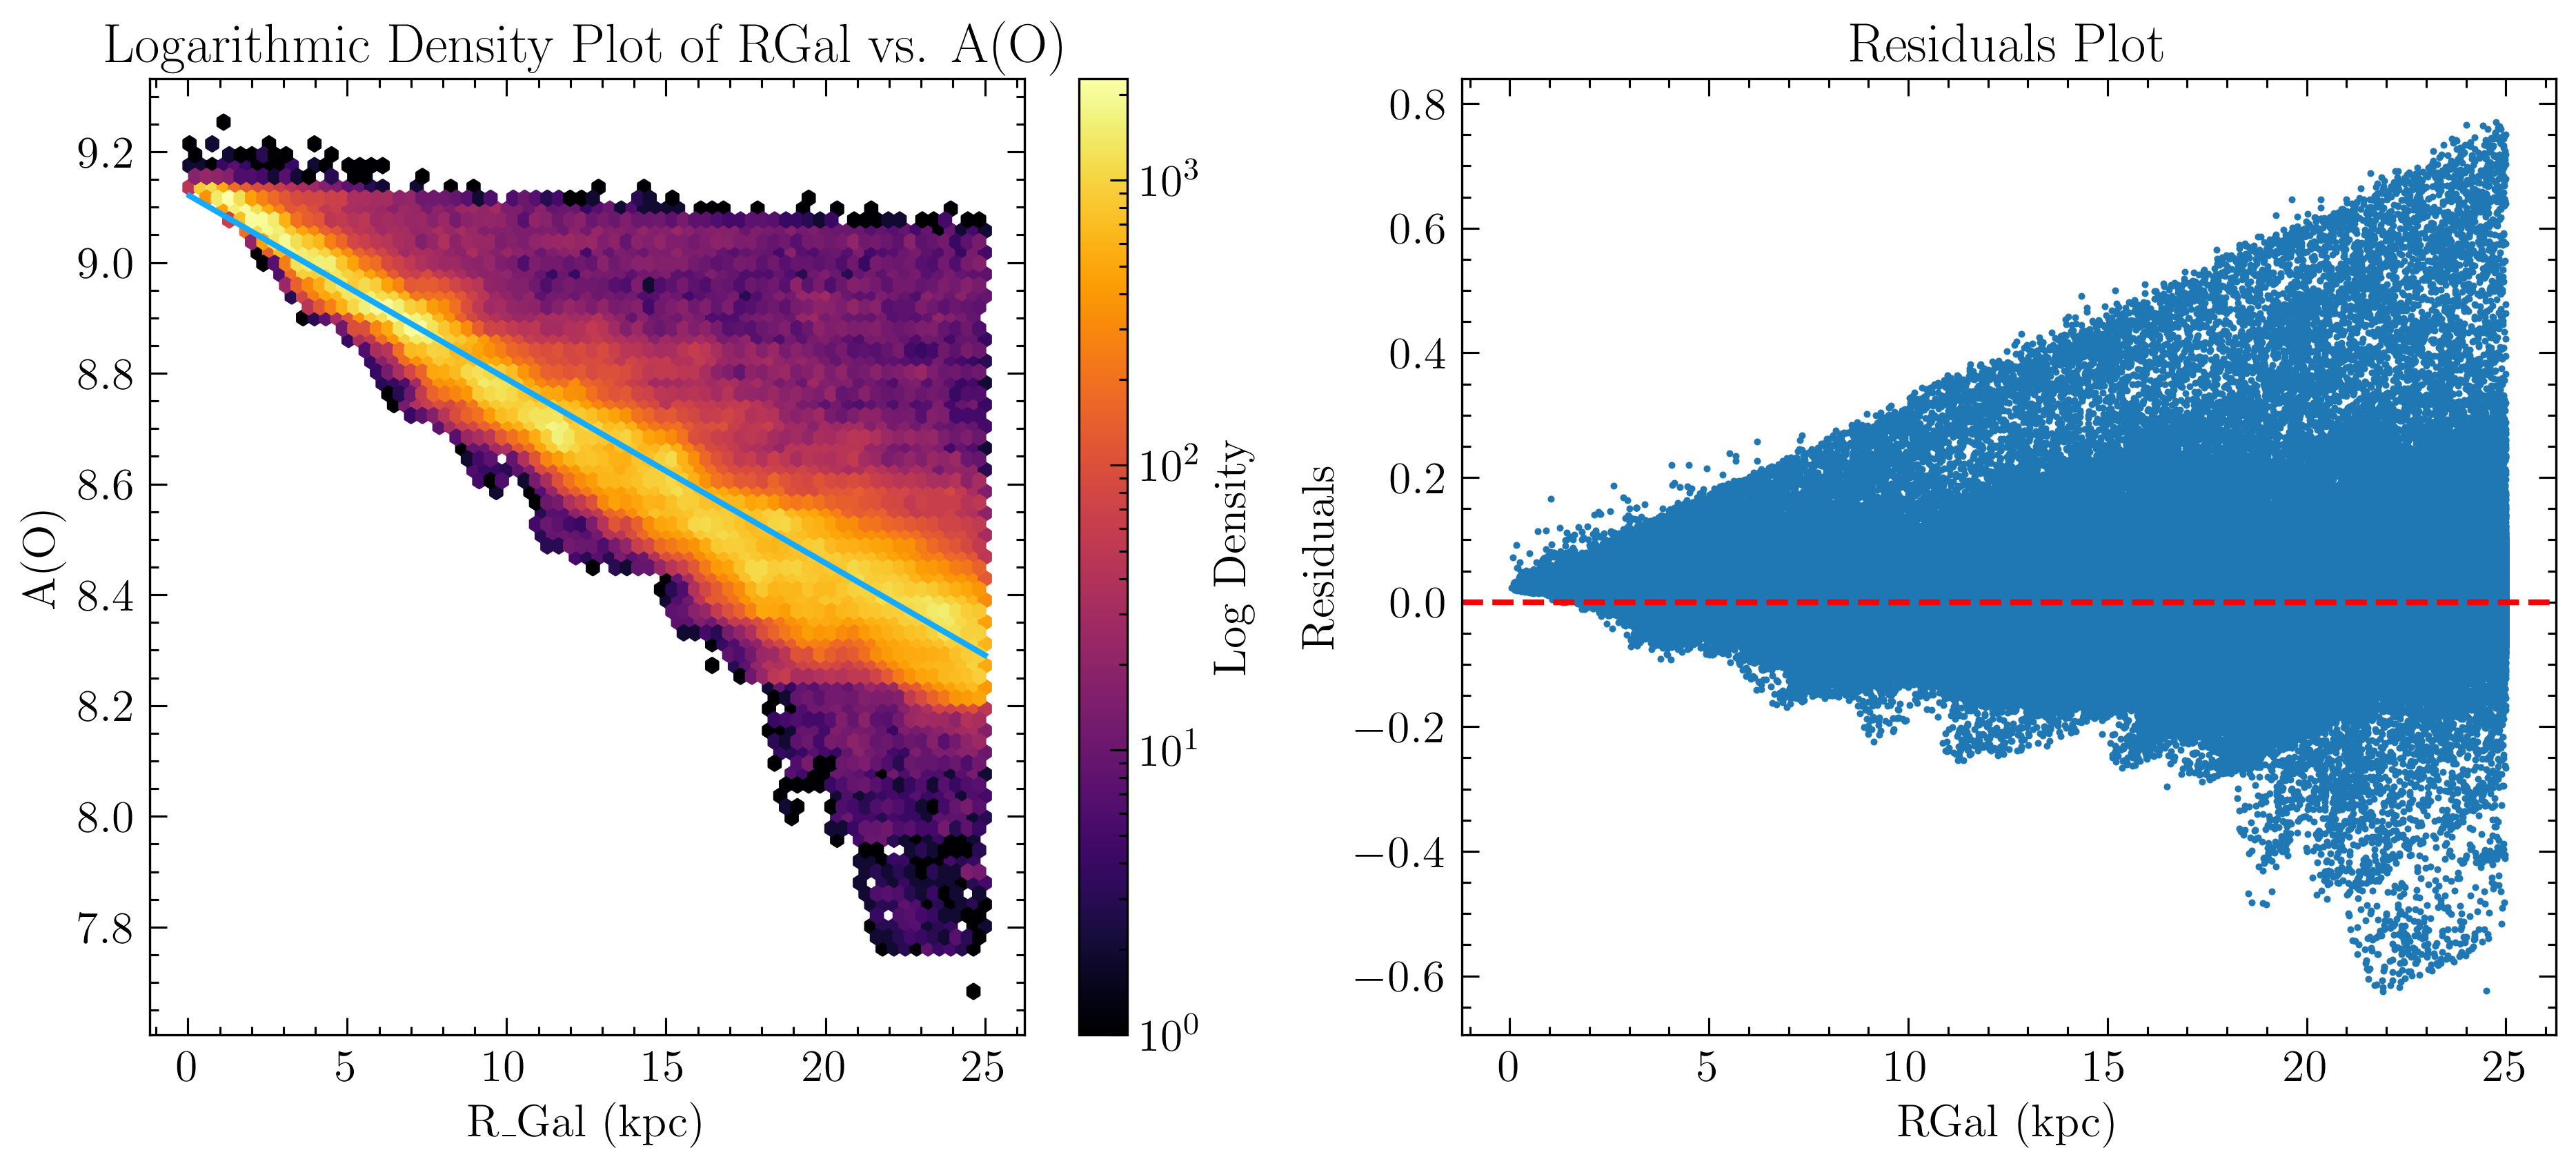

In [19]:
# Create the plot
# Create the figure
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)  # First subplot
ax2 = fig.add_subplot(122)  # Second subplot

# Creates log density plot of Rgal and metallicity 
hb = ax1.hexbin(RGal, A_O, gridsize=70, cmap='inferno', bins='log')
#ax1.plot(RGal, A_O_fit, color=(0.078, 0.667, 1.0), linewidth=5,label='Linear Fit')
ax1.plot(x_smooth, linear_fit, label='Linear Fit', color=(0.078, 0.667, 1.0))
ax1.set_xlabel('R_Gal (kpc)')
ax1.set_ylabel('A(O)')
ax1.set_title('Logarithmic Density Plot of RGal vs. A(O)')

# Plots the residuals 
ax2.scatter(RGal, residuals, s=2, alpha=1)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residual')
ax2.set_xlabel('RGal (kpc)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot')




#fit_info = f'Slope: {m:.2f}, Intercept: {b:.2f}, R²: {r_value**2:.2f}'
#ax1.legend([fitline[0]], [fit_info], loc='lower left')
plt.colorbar(hb, ax=ax1, label='Log Density')
plt.savefig('figures/RGal_vs_AO.png', bbox_inches='tight')
plt.show()
# Save the figure

plt.close()  # Close the figure to free memory

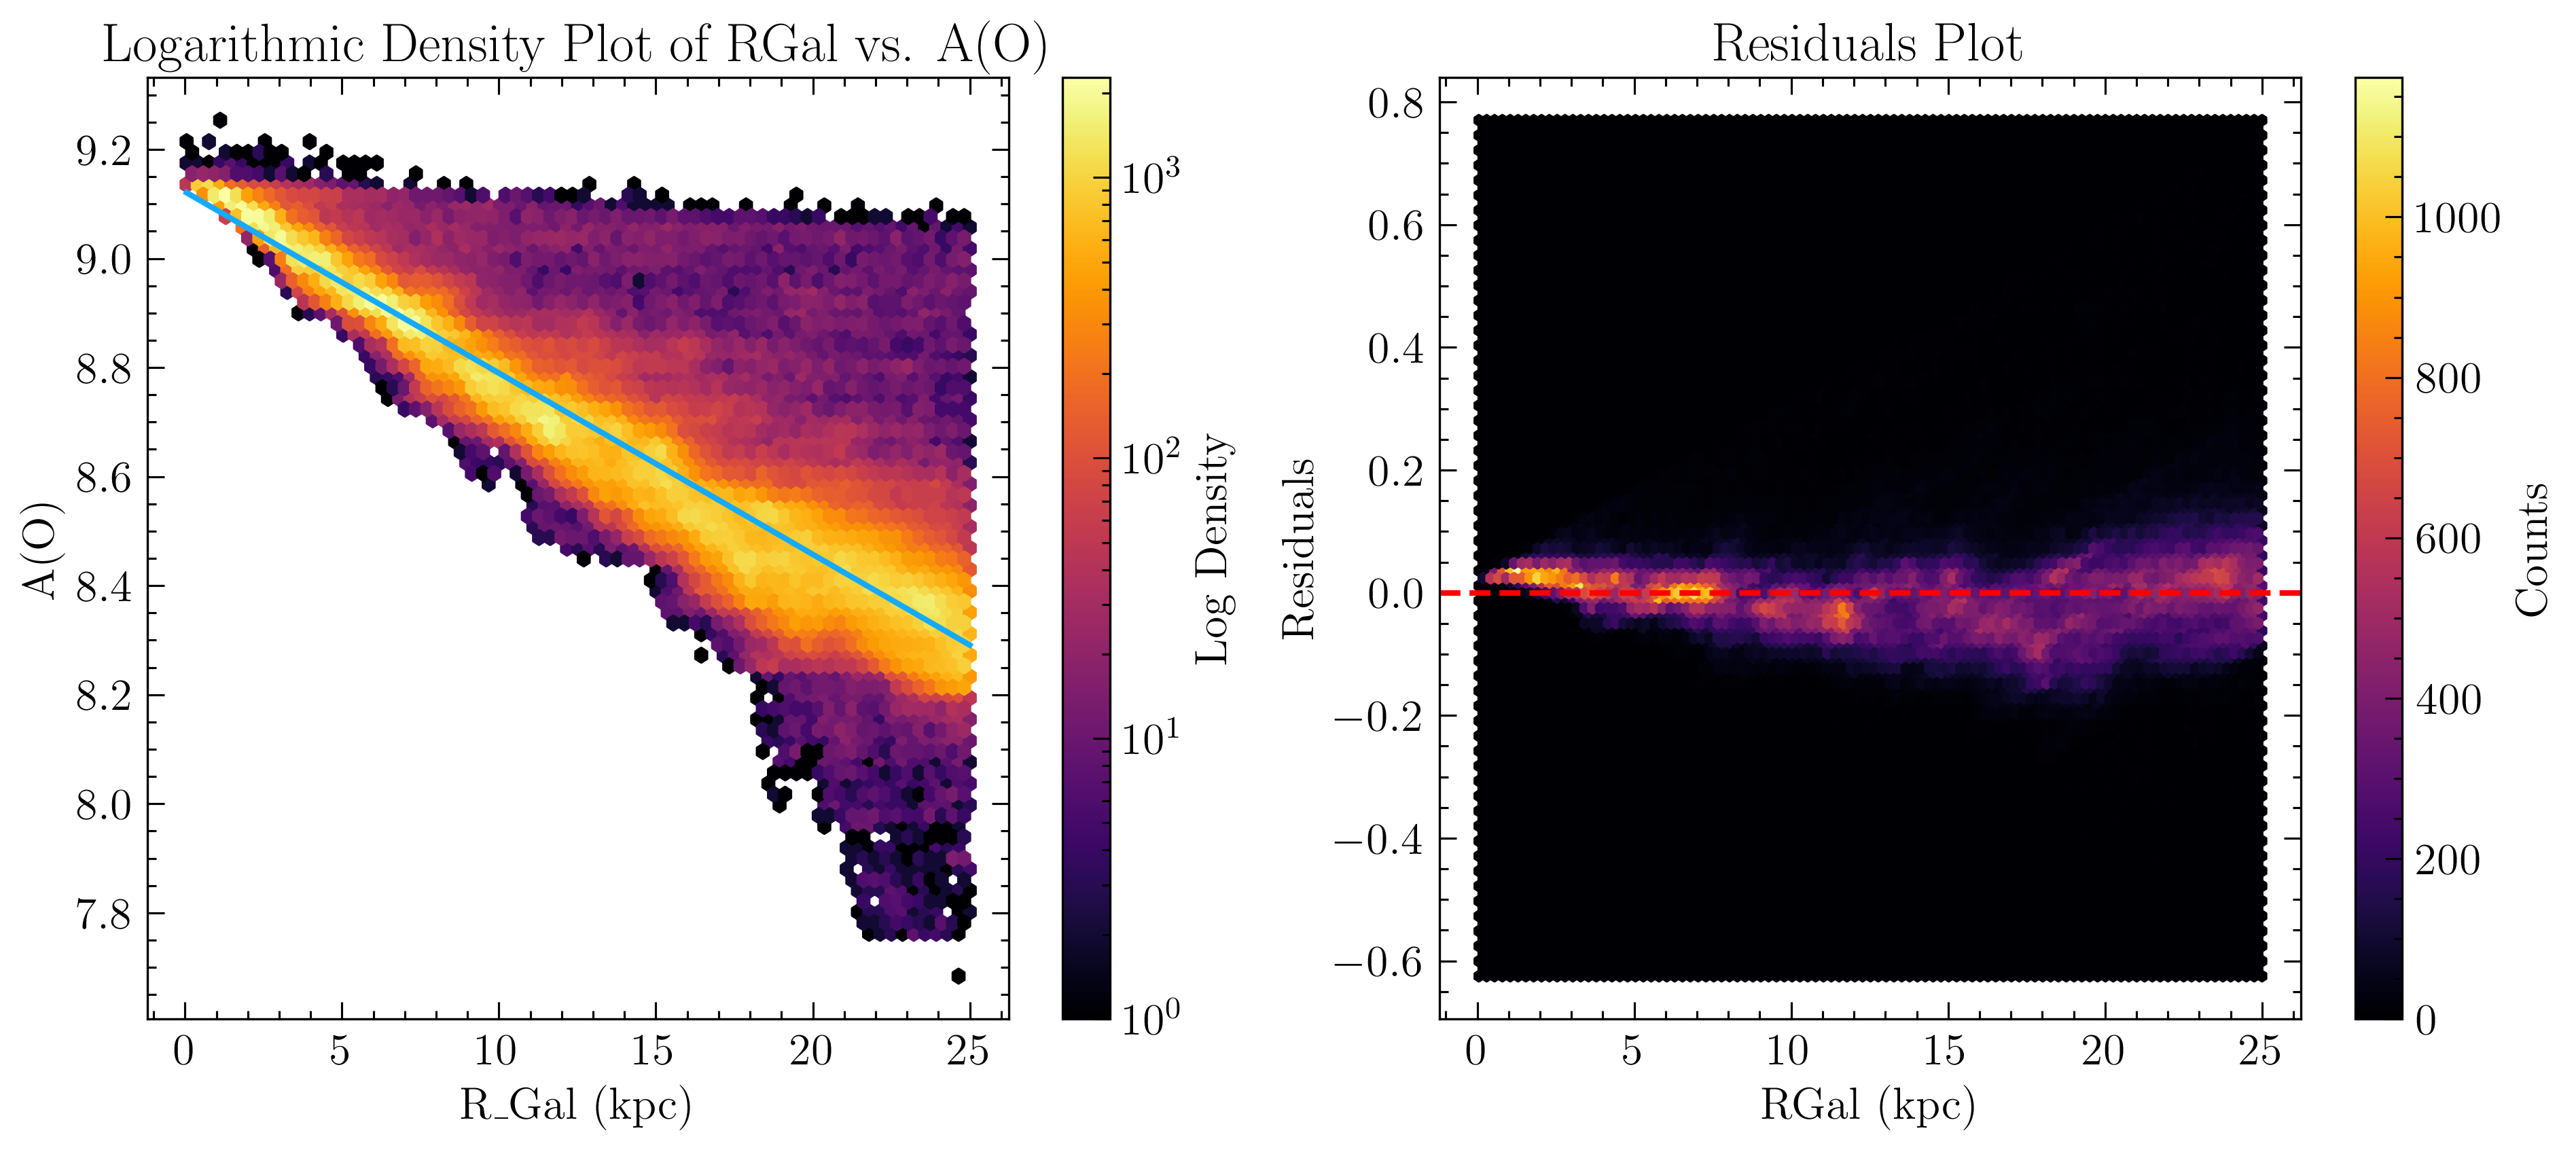

In [20]:
# Same as before but a different way to plot residuals 


# Create the plot
# Create the figure
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)  # First subplot
ax2 = fig.add_subplot(122)  # Second subplot

# Creates log density plot of Rgal and metallicity
hb = ax1.hexbin(RGal, A_O, gridsize=70, cmap='inferno', bins='log')
#ax1.plot(RGal, A_O_fit, color=(0.078, 0.667, 1.0), linewidth=5,label='Linear Fit')
ax1.plot(x_smooth, linear_fit, label='Linear Fit', color=(0.078, 0.667, 1.0))
ax1.set_xlabel('R_Gal (kpc)')
ax1.set_ylabel('A(O)')
ax1.set_title('Logarithmic Density Plot of RGal vs. A(O)')

# Plots the residuals
hb2 = ax2.hexbin(RGal, residuals, gridsize=100, cmap='inferno')
ax2.axhline(0, color='red', linestyle='--', label='Zero Residual')
ax2.set_xlabel('RGal (kpc)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot')


#fit_info = f'Slope: {m:.2f}, Intercept: {b:.2f}, R²: {r_value**2:.2f}'
#ax1.legend([fitline[0]], [fit_info], loc='lower left')
plt.colorbar(hb, ax=ax1, label='Log Density')
plt.colorbar(hb2, ax=ax2, label='Counts')
plt.savefig('figures/RGal_vs_AO.png', bbox_inches='tight')
plt.show()
# Save the figure

plt.close()  # Close the figure to free memory

#### Use a python fitting tool to fit a linear function to the data, reporting the intercept and slope with uncertainties. Include any hyperparameters used.

In [21]:
intercept = linear_model.params[0] #intercept of linear model 
slope = linear_model.params[1] # slope of linear model
intercept_std_err = linear_model.bse[0]  # Standard error of intercept
slope_std_err = linear_model.bse[1]  # Standard error of slope

print(f'Intercept: {intercept:.4f} ± {intercept_std_err:.4f}')
print(f'Slope: {slope:.4f} ± {slope_std_err:.4f}')

2097798006.py: Intercept: 9.1223 ± 0.0003
2097798006.py: Slope: -0.0333 ± 0.0000


In [22]:
# Print linear model summary (with statistical info)
print(linear_model.summary())

2485362591.py:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 3.513e+06
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:38:16   Log-Likelihood:             5.1984e+05
No. Observations:              511520   AIC:                        -1.040e+06
Df Residuals:                  511518   BIC:                        -1.040e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1223      0.000   3.

#### Discuss where the linear model fits well and where it does not. Use statistical metrics, such as the root mean squares or other goodness-of-fit indicators, to quantify the performance of your linear fit in general and regions with larger residuals.

- lower residenals at lower Rgal , higher resdiduals at higher Rgal 

#### Plot a 3-panel figure for the x vs. y plane using the same bins and sensible colormaps:

(a) 2D-histogram of the median simulated A(O)

(b) 2D-histogram of the median fitted A(O)

(c) 2D-histogram of the median residuals ∆A(O)

#### Describe your choice of 2D bins. Discuss what details would be missed with fewer bins or problems encountered with more bins.

#### Analyze the residuals in more detail and propose an explanation for any patterns you observe.

In [23]:
fits_file.close()

# Past ways to get linear models 

In [24]:
# Prepare the linear regression model
model = LinearRegression()
model.fit(RGal.reshape(-1, 1), A_O)
# Predict metallicity for the fitted model
A_O_fit = model.predict(RGal.reshape(-1, 1))

In [25]:
# Linear fit
linear_fit = np.polyfit(RGal, A_O, 1)  # 1 for linear
m, b = linear_fit  # slope and intercept

In [26]:
from scipy.optimize import curve_fit

# Define linear model
def linear_model(x, m, b):
    return m * x + b

In [27]:
popt_linear, pcov_linear = curve_fit(linear_model, RGal, A_O, absolute_sigma=True)
m_linear, b_linear = popt_linear
perr_linear = np.sqrt(np.diag(pcov_linear))

In [ ]:
print(f"Linear Fit: y = {m_linear:.2f}x + {b_linear:.2f}")
print(f"Linear Fit uncertainties: m = {perr_linear[0]:.2f}, b = {perr_linear[1]:.2f}")